## > Measuring similarity or distance
## > Data normalisation
## > Unsupervised learning: clustering
###          >Simple Example 1 of K-means Clustering
###          >Simple Example 2 of K-means Clustering
## > Text as Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

## Measuring Similarity
* In order to find clusters in a data set we need to have some way of telling how similar two observations are to each other.
* A cluster is a grouping of samples that are more similar to each other than they are to the samples in another cluster.
* The first step in understanding clustering is understanding how to measure similarity.

## Similarity and Distance
* The key to understanding similarity metrics is to think about measuring distance in the real world. When we graph a two dimensional data set, we get a layout of points on the plane. From this it is easy to see when two points are similar - they are close to each other on the graph.
* In two dimensions, we can measure the distance between the points  (x1,y1) and  (x2,y2) using Pythagoras Theorem.

Let's look at some data for describing cars and their MPG ragings:

In [2]:
names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']
autompg = pd.read_csv('auto-mpg.data', delim_whitespace=True, names=names)
autompg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


We could ask which is more similar to the "chevrolet chevelle malibu" - the "buick skylark 320" or the "plymouth satellite"?

In [3]:
# drop the name so that we just have the numerical columns
autompgN = autompg.drop('name', axis=1)

A = autompgN.loc[0]
B = autompgN.loc[1]
C = autompgN.loc[2]

# simple subtraction of two Series shows the difference
A-B

mpg               3.0
cylinders         0.0
displacement    -43.0
horsepower      -35.0
weight         -189.0
acceleration      0.5
year              0.0
origin            0.0
dtype: float64

In [4]:
# compute the sum of squares and take the square root
np.sqrt(np.square(A-B).sum()) 

196.98794379352256

In [5]:
np.sqrt(np.square(A-C).sum())

71.73562573784382

Therefore, "plymouth satellite" (C) is more similar to the "chevrolet chevelle malibu"(A) as compared to "buick skylark 320"(B).

## Problem due to Unnormalised Variables
* In this case, the units of each variable are quite different
         cylinders varies from 3 to 8
         displacement from 68 to 455
         weight from 1613 to 5140
* this means that a difference in weight would dominate the other variables
* solution is to normalise the data

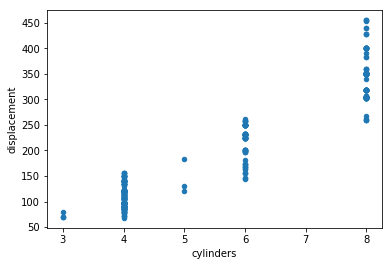

In [6]:
autompg.plot('cylinders', 'displacement', 'scatter')

(0, 450)

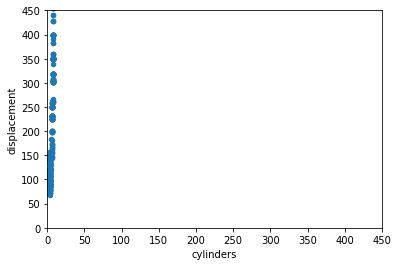

In [7]:
# plot again on equally spaced axes
autompg.plot('cylinders', 'displacement', 'scatter')
plt.ylim(0,450)
plt.xlim(0,450)

## Normalising Variables
* normalise to make the mean and standard deviation the same for every variable
* for each column:
         subtract the mean
         divide by the standard deviation
* result is data with mean of 0, std of 1.0

(-1, 1)

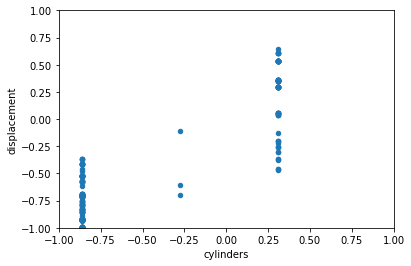

In [8]:
# subtract the mean, divide by the standard deviation
autompg_norm = (autompgN-autompgN.mean())/autompgN.std()
autompg_norm.plot('cylinders', 'displacement', 'scatter')
plt.ylim(-1,1)
plt.xlim(-1,1) 

In [9]:
print("Without normalisation:")
print("A -> B", np.sqrt(np.square(autompgN.iloc[0]-autompgN.iloc[1]).sum()))
print("A -> C", np.sqrt(np.square(autompgN.iloc[0]-autompgN.iloc[2]).sum()))
print("With normalisation:")
print("A -> B", np.sqrt(np.square(autompg_norm.iloc[0]-autompg_norm.iloc[1]).sum()))
print("A -> C", np.sqrt(np.square(autompg_norm.iloc[0]-autompg_norm.iloc[2]).sum()))

Without normalisation:
A -> B 196.98794379352256
A -> C 71.73562573784382
With normalisation:
A -> B 1.107146840365627
A -> C 0.6471676014562091


# Clustering

Now that we can measure whether two samples are similar or different, we can begin to look at clustering. There are two main families of clustering method:
* Partitional Algorithms
* Hierarchical Algorithms

Clustering is an example of unsupervised learning. Compared with linear/logistic regression (which are supervised) - to train those models we need to provide the true category labels to the training algorithm so that it can learn how to categorise the data.

Clustering can be used in cases where regression cannot. If we don't have any true labels for the data, we can still use clustering to see if there are any natural groups in the data. This can be a really useful data exploration technique.

## Partitional algorithms

Start with a random partition (split) of the data and try to refine it iteratively so that the partitions are better. They usually require that you nominate a fixed number of clusters to look for.

## Hierarchical algorithms

Organise the data into hierarchical (tree-like) structures where the most similar samples are grouped together, then similar groups are joined etc. This might be done **bottom-up** or **top-down**. The end result is a tree-like structure and these methods can be used when you don't know how many clusters there should be in the data.

## KMeans Clustering

The basic algorithm is:

  1. start with K randomly placed cluster centroids
  2. for each data point, assign it to the closest cluster centroid
  3. re-estimate the cluster centroids for each cluster based on the data points that belong to it
  4. if the centroid estimate has not changed significantly, stop, otherwise repeat from step 2.
  
  ## Method Used

K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. In k means clustering, we have the specify the number of clusters we want the data to be grouped into. The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps:
Reassign data points to the cluster whose centroid is closest. Calculate new centroid of each cluster. These two steps are repeated till the within cluster variation cannot be reduced any further. The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids.

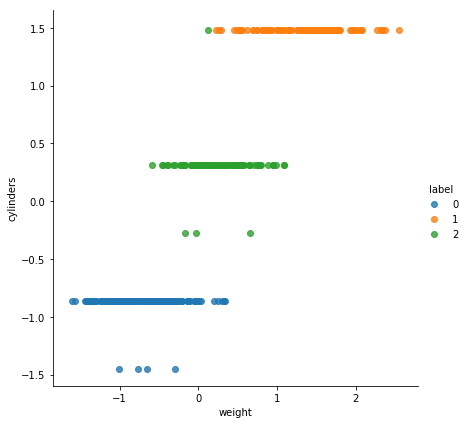

In [10]:
from sklearn.cluster import KMeans
# work on a copy of just a couple of variables
df = autompg_norm[['weight', 'cylinders']].copy()

kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
df['label'] = kmeans.predict(df)
sns.lmplot("weight", "cylinders", data=df, fit_reg=False, hue='label', height=6)

In [11]:
df.head()

,weight,cylinders,label
0,0.619748,1.482053,1
1,0.842258,1.482053,1
2,0.539692,1.482053,1
3,0.536160,1.482053,1
4,0.554997,1.482053,1


In [12]:
# what are the clusters? 
autompg[ df['label'] == 1].head() # Or autompg[ df['label'] == 1][['name', 'weight', 'cylinders']].head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [13]:
autompg[ df['label'] == 0].head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
14,24.0,4,113.0,95.0,2372.0,15.0,70,3,toyota corona mark ii
18,27.0,4,97.0,88.0,2130.0,14.5,70,3,datsun pl510
19,26.0,4,97.0,46.0,1835.0,20.5,70,2,volkswagen 1131 deluxe sedan
20,25.0,4,110.0,87.0,2672.0,17.5,70,2,peugeot 504
21,24.0,4,107.0,90.0,2430.0,14.5,70,2,audi 100 ls


In [14]:
autompg[ df['label'] == 2].head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
13,14.0,8,455.0,225.0,3086.0,10.0,70,1,buick estate wagon (sw)
15,22.0,6,198.0,95.0,2833.0,15.5,70,1,plymouth duster
16,18.0,6,199.0,97.0,2774.0,15.5,70,1,amc hornet
17,21.0,6,200.0,85.0,2587.0,16.0,70,1,ford maverick
24,21.0,6,199.0,90.0,2648.0,15.0,70,1,amc gremlin


## A Simple Example 1 of K-means Clustering

It is **very important to note, we actually have the labels for this data set, but we will NOT use them for the KMeans clustering algorithm, since that is an unsupervised learning algorithm.** 

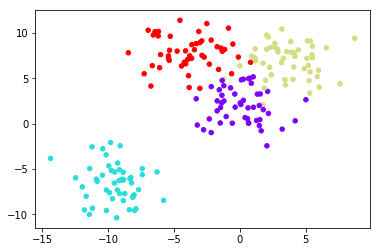

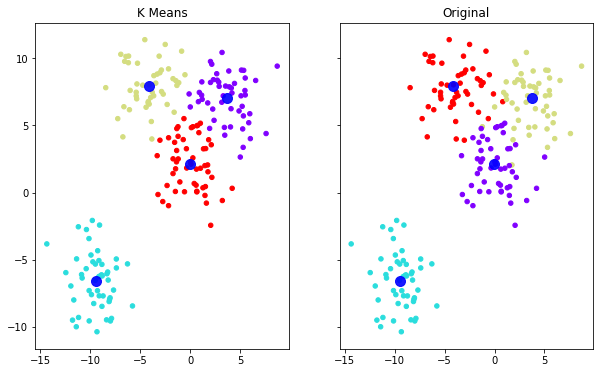

In [30]:
from sklearn.datasets import make_blobs

# Create Data
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.8,random_state=101)

# Visualizing the Initial data
plt.scatter(data[0][:,0],data[0][:,1],c=data[1], s = 20,cmap='rainbow')

# Creating the Clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(data[0])
kmeans.cluster_centers_
kmeans.labels_







f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))

ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_, s = 20,cmap='rainbow')
centers = kmeans.cluster_centers_
ax1.scatter(centers[:, 0], centers[:, 1], c = 'blue', s = 100, alpha = 0.9);


ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],s = 20,cmap='rainbow')
centers = kmeans.cluster_centers_
ax2.scatter(centers[:, 0], centers[:, 1], c = 'blue', s = 100, alpha = 0.9);

You should note, the colors are meaningless in reference between the two plots.

## A Simple Example 2 of K-means Clustering
Let us move to another example in which we are going to apply K-means clustering on simple digits dataset. K-means will try to identify similar digits without using the original label information.

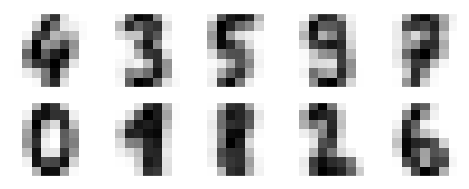

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans

# Next, load the digit dataset from sklearn and make an object of it. We can also find number of rows and columns in this dataset as follows
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape
# The above output shows that this dataset is having 1797 samples with 64 features.

kmeans = KMeans(n_clusters = 10, random_state = 0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape
# The above output shows that K-means created 10 clusters with 64 features.

fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)
# As output, we will get following image showing clusters centers learned by k-means.

In [41]:
# The following lines of code will match the learned cluster labels with the true labels found in them −
from scipy.stats import mode
labels = np.zeros_like(clusters)
for i in range(10):
   mask = (clusters == i)
   labels[mask] = mode(digits.target[mask])[0]

In [42]:
# Next, we can check the accuracy as follows −
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

The above output shows that the accuracy is around 80%.

## Some problems with KMeans Clustering

* Need to define the number of clusters
* Initial cluster centriods are arbitrary
     * choose K random points within the distribution
     * choose K data points
     * choose K data points that are maximally distinct
* Choice of centriods can affect the outcome
* There are variations on KMeans that give improved outcomes in some problems

## Hierarchical Clustering

KMeans is good if you know how many clusters to expect.

If you don't know how many clusters there might be, **Hierarchical Clustering** may be more useful.

* Bottom up clustering starts with individuals and groups the most similar together
* Top down clustering splits the data into two groups, then four etc

### Agglomorative Clustering

* **Bottom up** (agglomorative) clustering is easiest to understand.
* Use the distance metric to compute an  NxN similarity matrix containing the similarity between all pairs of items.
* Select the closest pair of items and merge them into our first cluster of two
* ...


* Next we merge the next closest.
      * This could be another two single items or
      * it could be one item and the just created cluster of two
* To measure the distance from the cluster we need a function that can compare clusters
* This continues until there is just one cluster.

We can visualise the clustering with a **dendrogram** -- a tree-like display of the clusters as they grow.

## Distance between clusters

* How do we compare cluster similarity?
* Distance between cluster centroids
* Distance between closest/furthest members
* Average distance between pairs of cluster members
* Ward's method:
       * relative size of the summed square distances within the combined cluster
       * merge two clusters if doing so results in the smaller summed square distances

In [31]:
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist

# work on a copy of just a couple of variables
df = autompg_norm[['weight', 'cylinders']].copy()

# compute the distance matrix
dist = pdist(df, 'euclidean')
linkage_matrix = linkage(dist,method = 'ward')  # or 'ward'

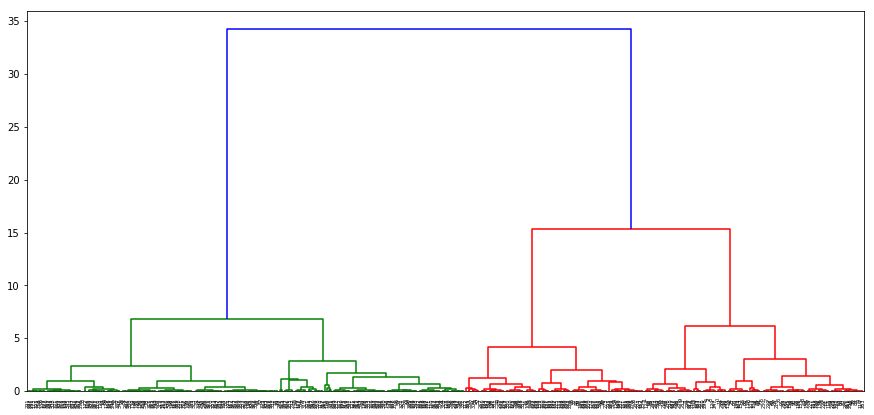

In [32]:
plt.figure(figsize=(15,7))
dendrogram(linkage_matrix)
plt.show()

### Dendograms

* Tree display of clusters
* Hieght of lines proportional to the distance between sub-clusters
* So, shorter lines means more similar within-clusters
* To choose how many 'natural' clusters, look for change from short to long lines
* Cut the tree at a specific number of clusters or tree height

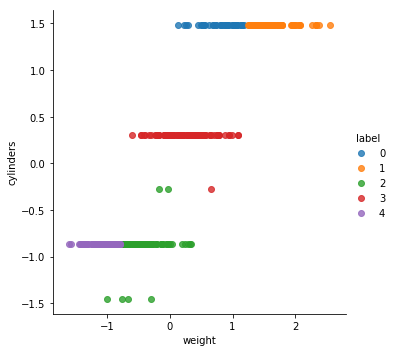

In [33]:
# get a fixed number of clusters using the cut_tree function
labels = cut_tree(linkage_matrix, n_clusters=5)
df['label'] = labels
_p = sns.lmplot("weight", "cylinders", data=df, fit_reg=False, hue='label')

## Text As Data -- Feature Extraction

How do we work with text as a data source in Data Science?

* text is unstructured data, compared with tabular data which has a fixed structure
* the information stored in text is encoded in human language, which has complex rules and is hard to understand with a machine
* but, we can take advantage of our knowledge of language to find some useful features to work with
* the first step in working with text is usually feature extraction where we derive some features from each text

### Feature Extraction

So far most of the data we've worked with has been observations of some real world event or object. Things are recorded or measured and written down. The **age** of a person, their **height, weight, the size** of a car engine etc. The feature extraction process is a physical one.

With text (or other digital objects like images, speech or video) we need to process the digital object to create the features we will use to analyse them. We need to extract structured data from the unstructured text so that we can use the analysis algorithms we know about.

### Measuring text

* number of characters, words, sentences (but what is a word/sentence)?
* presence or absence of certain key words
* frequence of certain key words
* presence of hashtags/mentions in tweets
* look for place names in text and convert to a geo-location
* look for dollar amounts in text
* determine the sentiment of a text - numerical scale negative-neutral-positive

### Bag of Words

* One way to represent a text is as a bag of words
* Basically the set of words in the text, ignoring ordering
* "cat ate mouse" is the same as "mouse ate cat"
* but, very effective for many tasks
* how do we turn this into a numerical vector?

### Word Vector

* Select the N most frequent words in your data
* Each word becomes a feature
* Feature value is either 0/1 or a count of frequency

In [4]:
f=open("coursenames.txt", "r") # reading and printing the text file
if f.mode == 'r':
    contents =f.read()
print(contents)

COMP111 - Introduction to Video Games
COMP115 - Introduction to Computer Programming
COMP125 - Fundamentals of Computer Science
COMP188 - Enrichment Topics in Computing
COMP202 - Systems Programming
COMP225 - Algorithms and Data Structures
COMP229 - Object Oriented Programming Practices
COMP247 - Data Communications
COMP249 - Web Technology
COMP255 - Software Engineering
COMP257 - Data Science
COMP260 - Game Design
COMP329 - Artificial Intelligence
COMP330 - Computer Graphics
COMP332 - Programming Languages
COMP333 - Algorithm Theory and Design
COMP335 - Distributed Systems
COMP336 - Big Data
COMP343 - Cryptography and Information Security
COMP344 - E Commerce Technology
COMP347 - Computer Networks
COMP348 - Document Processing and the Semantic Web
COMP350 - Special Topics in Computing and Information Systems
COMP352 - Videogames Project
COMP353 - Research Topic in Computing and Information Systems
COMP355 - Information Technology Project
COMP356 - Web Design and Development Project
CO

In [45]:
documents = []
with open('coursenames.txt') as fd:
    for line in fd:
        code, title = line.strip().split('-')
        documents.append({'code': code, 'title': title})
documents = pd.DataFrame(documents)
documents.head()

,code,title
0,COMP111,Introduction to Video Games
1,COMP115,Introduction to Computer Programming
2,COMP125,Fundamentals of Computer Science
3,COMP188,Enrichment Topics in Computing
4,COMP202,Systems Programming


In [46]:
# get a list of the words in all titles, initialise a dictionary to zero values for each word
vocab = {}
for title in documents.title:
    for word in title.split():
        vocab[word] = 0
vocab.items()

dict_items([('Introduction', 0), ('to', 0), ('Video', 0), ('Games', 0), ('Computer', 0), ('Programming', 0), ('Fundamentals', 0), ('of', 0), ('Science', 0), ('Enrichment', 0), ('Topics', 0), ('in', 0), ('Computing', 0), ('Systems', 0), ('Algorithms', 0), ('and', 0), ('Data', 0), ('Structures', 0), ('Object', 0), ('Oriented', 0), ('Practices', 0), ('Communications', 0), ('Web', 0), ('Technology', 0), ('Software', 0), ('Engineering', 0), ('Game', 0), ('Design', 0), ('Artificial', 0), ('Intelligence', 0), ('Graphics', 0), ('Languages', 0), ('Algorithm', 0), ('Theory', 0), ('Distributed', 0), ('Big', 0), ('Cryptography', 0), ('Information', 0), ('Security', 0), ('E', 0), ('Commerce', 0), ('Networks', 0), ('Document', 0), ('Processing', 0), ('the', 0), ('Semantic', 0), ('Special', 0), ('Videogames', 0), ('Project', 0), ('Research', 0), ('Topic', 0), ('Development', 0), ('Advanced', 0), ('Thesis', 0), ('A', 0), ('B', 0), ('IT', 0), ('&', 0), ('Society', 0), ('Business', 0), ('Database', 0), 

In [47]:
# for each document, copy the vocab dictionary, set feature to 1 if word is present
wv = []
for title in documents.title:
    d = vocab.copy()
    for word in title.split():
        d[word] = 1
    wv.append(d)
wv = pd.DataFrame(wv, index=documents.code)
wv.head()

,&,A,Advanced,Algorithm,Algorithms,Applications,Artificial,B,Big,Business,...,Topic,Topics,Video,Videogames,Web,and,in,of,the,to
code,,,,,,,,,,,,,,,,,,,,,
COMP111,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
COMP115,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
COMP125,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
COMP188,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
COMP202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Clustering Text

* We now have a feature set for our collection of texts
* Feature values are 0 or 1 for each word
* We can apply the clustering algorithm to this to find groups of titles
* Try hierarchical clustering...

In [48]:
dist = pdist(wv, 'euclidean')
linkage_matrix = linkage(dist,method = 'complete')  # or 'ward'

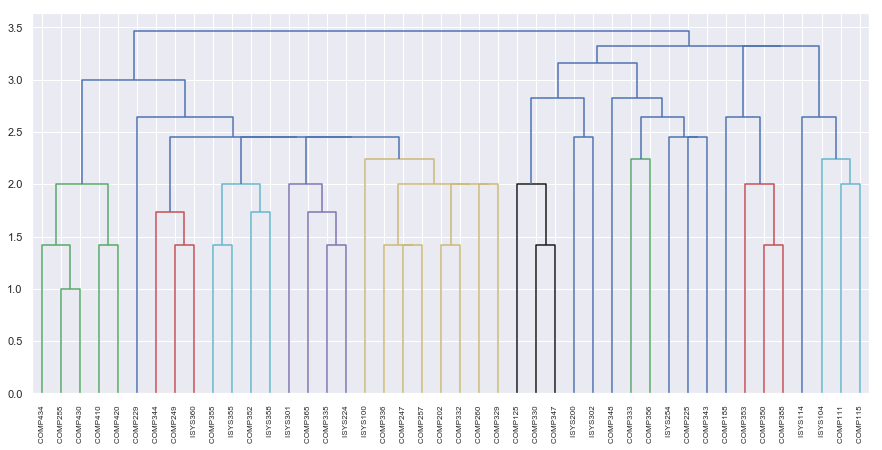

In [49]:
plt.figure(figsize=(15,7))
dendrogram(linkage_matrix, labels=wv.index)
plt.show()

What can we see in this dendogram? The main feature is that the lowest level lines are much longer than in our previous example with the autompg data. Since the length of the line is related to the similarity of the cluster this means that the individual unit titles are not as similar to each other as the cars were. This is because there are so few words in the titles so the overlap is not very great.
It would be hard to derive a particular group of clusters from this result.

### TF-IDF

A word vector containing 1 and 0 values is the simplest representation of a text but it misses a lot of detail. An improvement would be to include the count of the number of times that word occurs - term frequency.
Documents where a word occurs many times would be more similar to others with high frequency of this word. Stories about elephants would be more similar to each other than to one about a zoo that mentions elephants just once.
We can go further. Consider words like 'the'. Almost every document will have a high term frequency for 'the', it won't help finding similar documents. Another useful measure is inverse document frequency which is 1 divided by the frequency of the term in all documents. IDF of 'the' will be very small (1/large number). We define TF-IDF as the product of the term frequency and the inverse document frequency.
TF-IDF for a common word like 'the' will be low. For a useful word like 'elephant' it will be higher since that word isn't very frequent overall but occurs often in documents about elephants.
Let's run an experiment on some more unit data, this time with the unit descriptions which are longer and should provide more information for clustering. I will use the sklearn module to extract TfIDF features since it has a built in feature extractor for that purpose.

In [50]:
descriptions = pd.read_csv('unit-descriptions.csv')
descriptions.head()

,code,description
0,COMP107,This unit tackles cyber security as a multidis...
1,COMP111,Video games provide the only real example of t...
2,COMP115,This unit is an introductory computer science ...
3,COMP125,This unit studies programming as a systematic ...
4,COMP202,This unit studies the boundary between softwar...


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
# we make a vectorizer to extract the TFIDF features, we ask for at most 100 features - so the 100 highest
# ranked words will be used

vectorizer = TfidfVectorizer(max_features=50)

# use fit_transform to fit the model and transform the data into feature vectors
# we convert it to an array (default return value is a sparse array which doesn't work with scipy clustering)
X = vectorizer.fit_transform(descriptions.description).toarray()
# look at the first vector
X[0]

array([0.        , 0.        , 0.        , 0.42740581, 0.        ,
       0.        , 0.31172365, 0.        , 0.15493175, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.26686149, 0.        , 0.14421555, 0.14936737,
       0.        , 0.33521267, 0.        , 0.16760633, 0.0712343 ,
       0.23884063, 0.        , 0.        , 0.        , 0.15493175,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.18311877, 0.14421555, 0.43796602, 0.        ,
       0.1424686 , 0.16506449, 0.        , 0.        , 0.1424686 ,
       0.        , 0.        , 0.20311777, 0.        , 0.        ])

In [52]:
# what are the features selected
print(vectorizer.get_feature_names())

['algorithms', 'also', 'an', 'and', 'applications', 'are', 'as', 'be', 'by', 'computer', 'computing', 'data', 'design', 'development', 'for', 'game', 'in', 'include', 'information', 'introduces', 'is', 'it', 'languages', 'management', 'of', 'on', 'practical', 'programming', 'project', 'provides', 'research', 'software', 'students', 'such', 'systems', 'techniques', 'technology', 'that', 'the', 'their', 'this', 'to', 'tools', 'topics', 'unit', 'used', 'using', 'web', 'will', 'with']


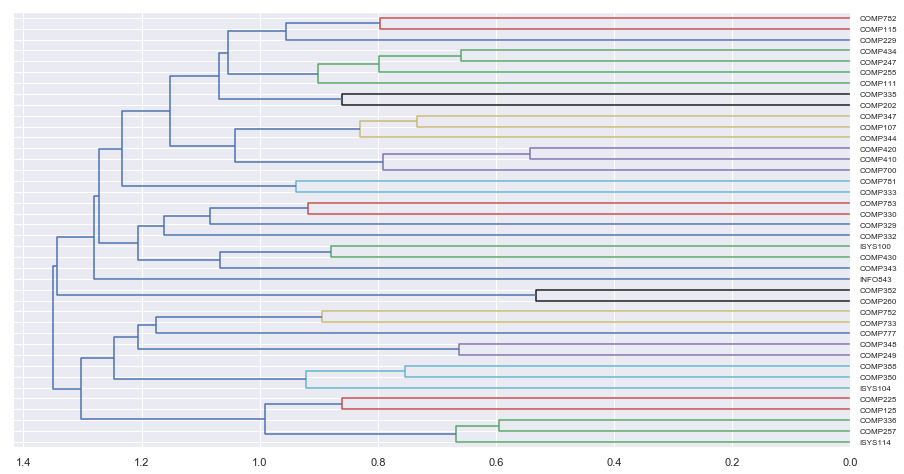

In [53]:
# now do the hierarchical clustering as before
dist = pdist(X, 'euclidean')
linkage_matrix = linkage(dist, method = 'complete')  # or 'ward'
plt.figure(figsize=(15,8))
dendrogram(linkage_matrix, labels=list(descriptions.code), orientation='left')
plt.show()

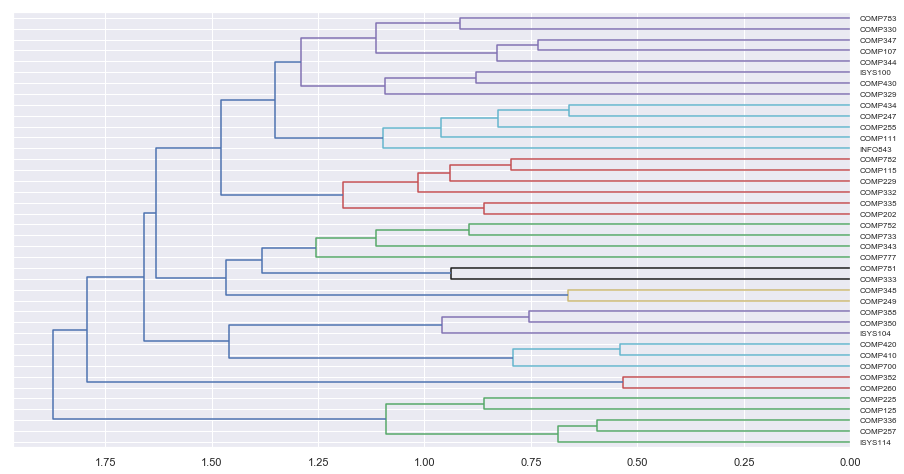

In [54]:
# compare with 'ward' distance metric
linkage_matrix = linkage(dist, method = 'ward')  # or 'ward'
plt.figure(figsize=(15,8))
dendrogram(linkage_matrix, labels=list(descriptions.code), orientation='left')
plt.show()

Are these results more interesting than the clustering of titles? COMP257 (Data Science) pairs with COMP336 (Big Data) which makes sense. Some other groupings can be interpreted too. The dendograms for the two methods look quite different but the resulting clusters are similar.